In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 53.3 MB/s eta 0:00:00


In [ ]:
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd

import numpy as np

In [ ]:
import pandas as pd

data = {
    'Compound_name': [
        'Imatinib',
        'NERATINIB',
        'SITAGLIPTIN',
        'SUNITINIB'
    ],
    'ChEMBL ID': [
        'CHEMBL941',
        'CHEMBL180022',
        'CHEMBL1422',
        'CHEMBL535'
    ],
    'Smiles': [
        'Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1',
        'CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C',
        'N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)c(F)cc1F',
        'CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\\C(=O)Nc3ccc(F)cc32)c1C'
    ]
}

df = pd.DataFrame(data)



In [ ]:
df

,Compound_name,ChEMBL ID,Smiles
0,Imatinib,CHEMBL941,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...
1,NERATINIB,CHEMBL180022,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...
2,SITAGLIPTIN,CHEMBL1422,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...
3,SUNITINIB,CHEMBL535,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...


In [ ]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        mol=Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names


Mol_descriptors,desc_names = RDkit_descriptors(df['Smiles'])

In [ ]:
df_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_descriptors

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.117780,14.117780,0.154795,-4.257134,0.389416,32.918919,493.615,462.367,493.259009,188,...,0,0,0,0,0,0,0,0,0,0
1,13.829273,13.829273,0.132066,-4.082803,0.218475,23.975000,557.054,527.822,556.198966,204,...,0,0,0,0,0,0,0,0,0,0
2,14.872781,14.872781,0.708668,-5.589257,0.621638,30.964286,407.318,392.198,407.118079,152,...,0,0,0,0,0,0,0,0,0,0
3,14.823493,14.823493,0.204620,-4.799353,0.626303,32.413793,398.482,371.266,398.211804,154,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_descriptors_scaled = scaler.fit_transform(df_descriptors)


df_descriptors_scaled = pd.DataFrame(df_descriptors_scaled, columns=df_descriptors.columns)

df_descriptors_scaled = df_descriptors_scaled.drop(df_descriptors_scaled.columns[42], axis=1)

df_descriptors_scaled



,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-0.652122,-0.652122,-0.611861,0.724509,-0.435782,0.794081,0.451924,0.388424,0.454532,0.606933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.294130,-1.294130,-0.707610,1.021694,-1.435123,-1.697115,1.423848,1.449815,1.422266,1.326261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.027965,1.027965,1.721435,-1.546383,0.921815,0.249647,-0.870199,-0.749407,-0.869930,-1.011555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.918287,0.918287,-0.401964,-0.199820,0.949090,0.653386,-1.005572,-1.088831,-1.006868,-0.921639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i)
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)
    return np.array(Morgan_fpts)

In [ ]:
Morgan_fpts = morgan_fpts(df['Smiles'])
Morgan_fpts.shape

[11:59:45] DEPRECATION WARNING: please use MorganGenerator
[11:59:45] DEPRECATION WARNING: please use MorganGenerator
[11:59:45] DEPRECATION WARNING: please use MorganGenerator
[11:59:45] DEPRECATION WARNING: please use MorganGenerator


(4, 2048)

In [ ]:
df_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Morgan_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
df_fingerprints

,Morgan_0,Morgan_1,Morgan_2,Morgan_3,Morgan_4,Morgan_5,Morgan_6,Morgan_7,Morgan_8,Morgan_9,...,Morgan_2038,Morgan_2039,Morgan_2040,Morgan_2041,Morgan_2042,Morgan_2043,Morgan_2044,Morgan_2045,Morgan_2046,Morgan_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

# Now safely concatenate
df_final = pd.concat([df, df_descriptors_scaled, df_fingerprints], axis=1)



In [ ]:
df_final

,Compound_name,ChEMBL ID,Smiles,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,Morgan_2038,Morgan_2039,Morgan_2040,Morgan_2041,Morgan_2042,Morgan_2043,Morgan_2044,Morgan_2045,Morgan_2046,Morgan_2047
0,Imatinib,CHEMBL941,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,-0.652122,-0.652122,-0.611861,0.724509,-0.435782,0.794081,0.451924,...,0,0,0,0,0,0,0,0,0,0
1,NERATINIB,CHEMBL180022,CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2...,-1.294130,-1.294130,-0.707610,1.021694,-1.435123,-1.697115,1.423848,...,0,0,0,0,0,0,0,0,0,0
2,SITAGLIPTIN,CHEMBL1422,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,1.027965,1.027965,1.721435,-1.546383,0.921815,0.249647,-0.870199,...,0,0,0,0,0,0,0,0,0,0
3,SUNITINIB,CHEMBL535,CCN(CC)CCNC(=O)c1c(C)[nH]c(/C=C2\C(=O)Nc3ccc(F...,0.918287,0.918287,-0.401964,-0.199820,0.949090,0.653386,-1.005572,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = df_final.drop(columns=['Compound_name', 'ChEMBL ID', 'Smiles'])


In [ ]:
X

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,Morgan_2038,Morgan_2039,Morgan_2040,Morgan_2041,Morgan_2042,Morgan_2043,Morgan_2044,Morgan_2045,Morgan_2046,Morgan_2047
0,-0.652122,-0.652122,-0.611861,0.724509,-0.435782,0.794081,0.451924,0.388424,0.454532,0.606933,...,0,0,0,0,0,0,0,0,0,0
1,-1.294130,-1.294130,-0.707610,1.021694,-1.435123,-1.697115,1.423848,1.449815,1.422266,1.326261,...,0,0,0,0,0,0,0,0,0,0
2,1.027965,1.027965,1.721435,-1.546383,0.921815,0.249647,-0.870199,-0.749407,-0.869930,-1.011555,...,0,0,0,0,0,0,0,0,0,0
3,0.918287,0.918287,-0.401964,-0.199820,0.949090,0.653386,-1.005572,-1.088831,-1.006868,-0.921639,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('trained_model.h5')

In [ ]:
X1 = df_descriptors_scaled
X2 = df_fingerprints

In [ ]:
X1

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-0.652122,-0.652122,-0.611861,0.724509,-0.435782,0.794081,0.451924,0.388424,0.454532,0.606933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.294130,-1.294130,-0.707610,1.021694,-1.435123,-1.697115,1.423848,1.449815,1.422266,1.326261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.027965,1.027965,1.721435,-1.546383,0.921815,0.249647,-0.870199,-0.749407,-0.869930,-1.011555,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.918287,0.918287,-0.401964,-0.199820,0.949090,0.653386,-1.005572,-1.088831,-1.006868,-0.921639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

prediction = model.predict([X1, X2])

output = (prediction > 0.5).astype(int)

print(output)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
[[1]
 [0]
 [1]
 [1]]


In [ ]:
pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
model_descriptor = load_model('descriptor_model.h5')

model_fingerprint = load_model('fingerprint_model.h5')

In [ ]:
import shap
import numpy as np


explainer = shap.Explainer(model_fingerprint, df_fingerprints)

shap_values = explainer.shap_values(df_fingerprints)



PermutationExplainer explainer: 5it [00:22,  5.72s/it]


<ipython-input-24-c958df29035d>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, df_fingerprints, max_display=10)


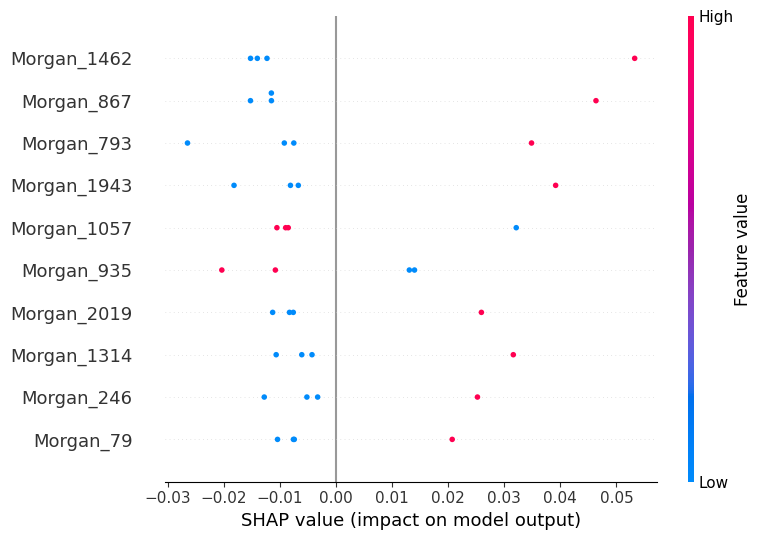

In [ ]:
shap.summary_plot(shap_values, df_fingerprints, max_display=10)

In [ ]:
explainer = shap.Explainer(model_descriptor, df_descriptors_scaled)

shap_values = explainer.shap_values(df_descriptors_scaled)

<ipython-input-26-87f08f4f8e19>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, df_descriptors_scaled, max_display=10)


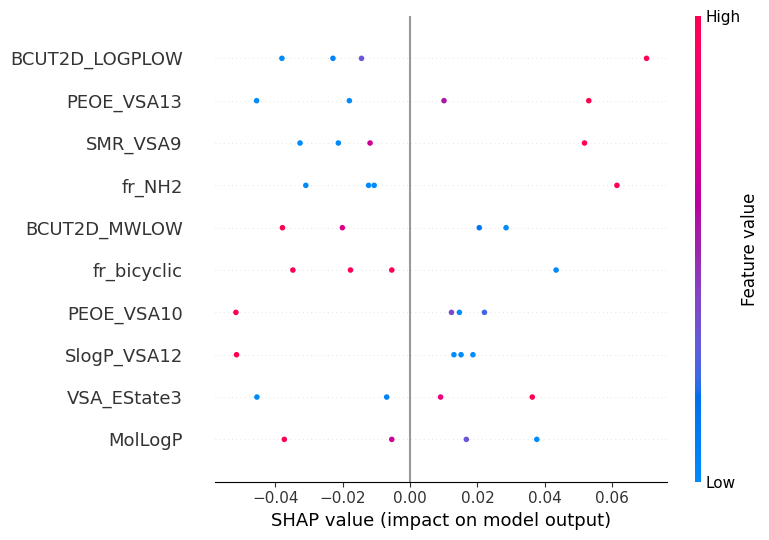

In [ ]:
shap.summary_plot(shap_values, df_descriptors_scaled, max_display=10)


In [ ]:
# Remove conflicting installs (optional safety)
!pip uninstall -y rdkit-pypi
!pip install -q rdkit==2023.09.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.6 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import rdMolDraw2D

print("RDKit working correctly!")

RDKit working correctly!


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import io


In [ ]:
def show_morgan_plot(target_bits, smiles):

  mol = Chem.MolFromSmiles(smiles)
  AllChem.Compute2DCoords(mol)

  # Compute Morgan fingerprint
  radius = 2
  nBits = 2048
  info = {}
  fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits, bitInfo=info)


  # Generate image from SVG
  def svg_to_img(svg):
    from cairosvg import svg2png
    png_data = svg2png(bytestring=svg.encode('utf-8'))
    return Image.open(io.BytesIO(png_data))

  # Draw substructure for each bit
  def draw_substructure_svg(mol, bit_id, info_dict):
    if bit_id not in info_dict:
        print(f"Bit {bit_id} not found in fingerprint.")
        return None

    highlight_atoms = set()
    highlight_bonds = set()

    for atom_idx, rad in info_dict[bit_id]:
        env = Chem.FindAtomEnvironmentOfRadiusN(mol, rad, atom_idx)
        highlight_bonds.update(env)
        for b in env:
            bond = mol.GetBondWithIdx(b)
            highlight_atoms.add(bond.GetBeginAtomIdx())
            highlight_atoms.add(bond.GetEndAtomIdx())

    drawer = rdMolDraw2D.MolDraw2DSVG(300, 300)
    rdMolDraw2D.PrepareAndDrawMolecule(
        drawer, mol,
        highlightAtoms=list(highlight_atoms),
        highlightBonds=list(highlight_bonds),
        highlightAtomColors={idx: (0.9, 0.2, 0.2) for idx in highlight_atoms},
        highlightBondColors={idx: (0.9, 0.2, 0.2) for idx in highlight_bonds},
    )
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg_to_img(svg)

  # Draw the full molecule
  def draw_full_molecule(mol):
    drawer = rdMolDraw2D.MolDraw2DSVG(300, 300)
    rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg_to_img(svg)

  # Create the figure
  full_img = draw_full_molecule(mol)
  bit_imgs = [draw_substructure_svg(mol, bit, info) for bit in target_bits]

  #  Combine images into one panel
  fig, axes = plt.subplots(1, len(bit_imgs) + 1, figsize=(16, 4))

  axes[0].imshow(full_img)
  axes[0].axis('off')
  axes[0].set_title(smiles)

  for i, img in enumerate(bit_imgs):
    axes[i + 1].imshow(img)
    axes[i + 1].axis('off')
    axes[i + 1].set_title(f"Morgan {target_bits[i]}")

  plt.tight_layout()
  plt.savefig("morgan_highlight.png", dpi=300)
  plt.show()

##For Compound 1

In [ ]:
explainer = shap.Explainer(model_fingerprint, df_fingerprints[:1])

shap_values = explainer.shap_values(df_fingerprints[:1])


<ipython-input-32-e1cb90b59433>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, df_fingerprints[:1])


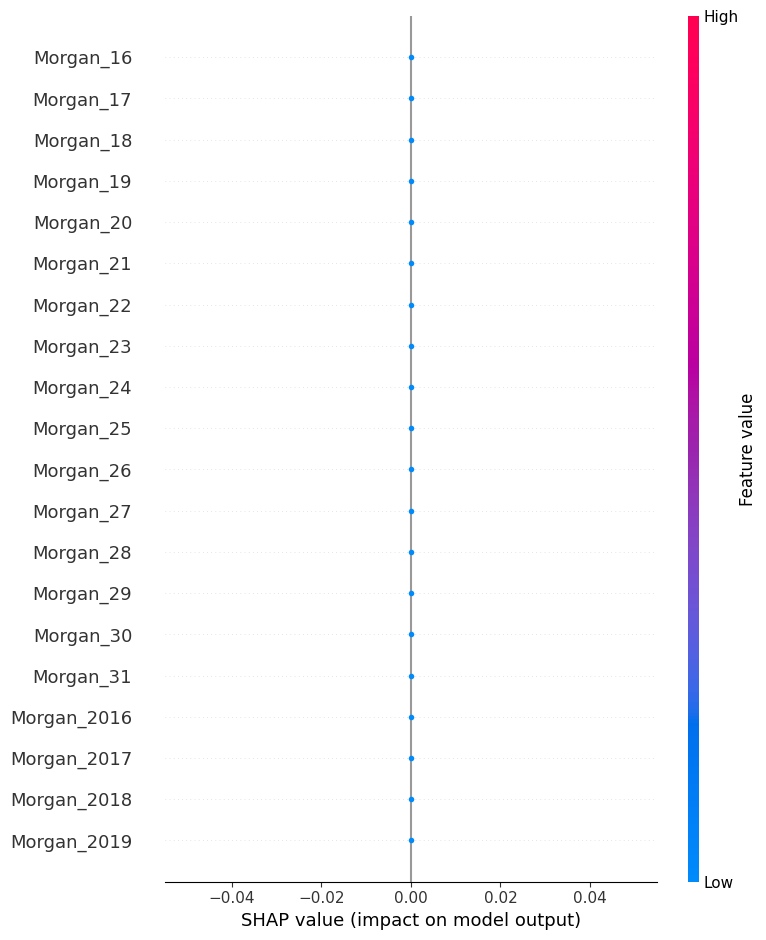

In [ ]:
shap.summary_plot(shap_values, df_fingerprints[:1])

In [ ]:
!pip install cairosvg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
# Input SMILES
smiles_1st = df.loc[0, 'Smiles']
mol = Chem.MolFromSmiles(smiles_1st)

# Get Morgan fingerprint and bitInfo
info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=info)

# Print all active bit IDs
active_bits = sorted(info.keys())
print("Active Morgan bit IDs in the molecule:")
print(active_bits)

Active Morgan bit IDs in the molecule:
[14, 74, 80, 184, 191, 207, 257, 310, 378, 437, 458, 486, 491, 541, 555, 650, 658, 736, 784, 787, 807, 843, 875, 926, 935, 980, 1043, 1057, 1085, 1088, 1145, 1152, 1160, 1224, 1236, 1380, 1385, 1391, 1423, 1452, 1480, 1535, 1582, 1586, 1603, 1665, 1683, 1691, 1697, 1722, 1750, 1754, 1765, 1771, 1791, 1795, 1816, 1819, 1855, 1866, 1873, 1917, 1956, 1978, 2036]


[12:00:52] DEPRECATION WARNING: please use MorganGenerator


[12:00:52] DEPRECATION WARNING: please use MorganGenerator


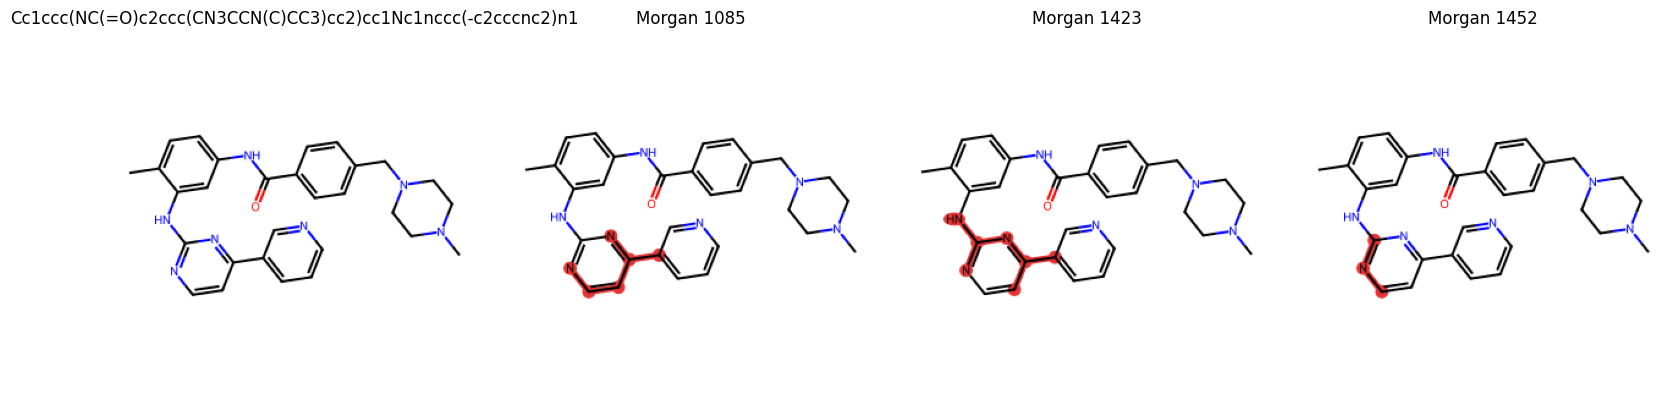

In [ ]:
show_morgan_plot([1085, 1423, 1452], smiles_1st)

In [ ]:
import requests

chembl_id = "CHEMBL941"

# Get all bioactivities for Imatinib
response = requests.get(f"https://www.ebi.ac.uk/chembl/api/data/activity.json?molecule_chembl_id={chembl_id}&limit=1000")
targets = set()
for act in response.json()['activities']:
    targets.add(act.get("target_chembl_id"))

kinases_of_interest = {"kit", "pdgfra", "pdgfrb", "csf1r"}
matched_kinases = set()

# Fetch target details and check if in kinases_of_interest
for tid in targets:
    target_data = requests.get(f"https://www.ebi.ac.uk/chembl/api/data/target/{tid}.json").json()
    if "target_components" in target_data:
        for comp in target_data["target_components"]:
            name = comp.get("component_description", "")
            if name and any(k.lower() in name.lower() for k in kinases_of_interest):
                matched_kinases.add(name)

print("Imatinib targets the following kinases:")
for kinase in sorted(matched_kinases):
    print(f"- {kinase}")


Imatinib targets the following kinases:
- Mast/stem cell growth factor receptor Kit


##For Compound 2

In [ ]:


explainer = shap.Explainer(model_fingerprint, df_fingerprints[:2])

shap_values = explainer.shap_values(df_fingerprints[:2])

<ipython-input-38-08f18ef9ddd3>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, df_fingerprints[:2])


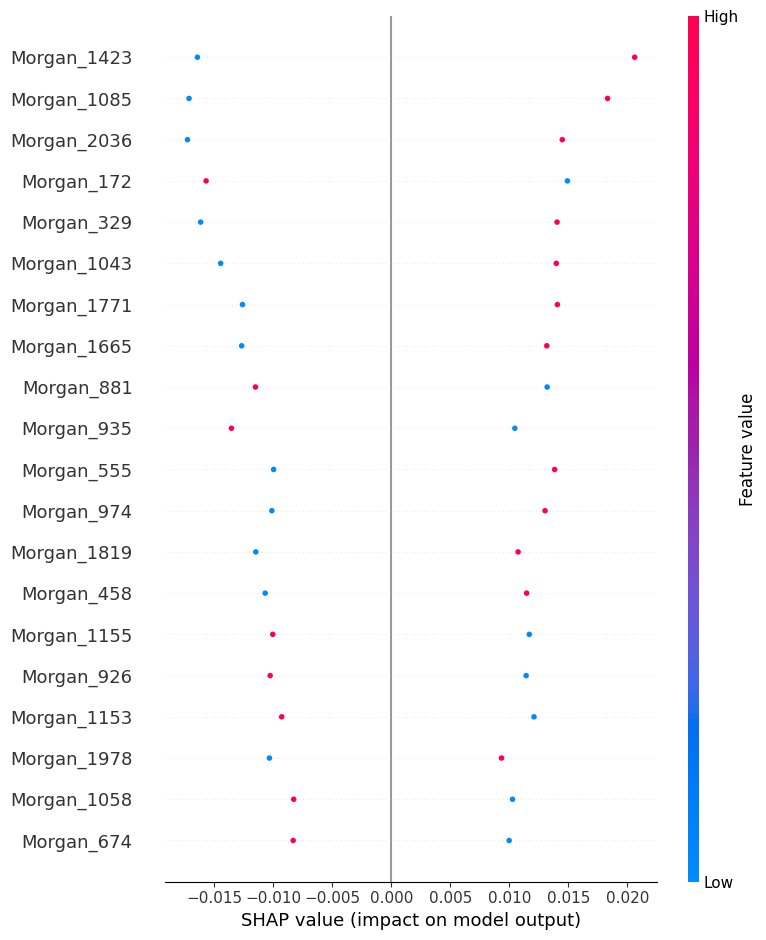

In [ ]:
shap.summary_plot(shap_values, df_fingerprints[:2])

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Input SMILES
smiles_2nd = df.loc[1, 'Smiles']
mol = Chem.MolFromSmiles(smiles_2nd)

# Get Morgan fingerprint and bitInfo
info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=info)

# Print all active bit IDs
active_bits = sorted(info.keys())
print("Active Morgan bit IDs in the molecule:")
print(active_bits)


Active Morgan bit IDs in the molecule:
[31, 80, 94, 168, 172, 191, 237, 249, 294, 329, 361, 366, 378, 381, 425, 448, 491, 561, 650, 652, 673, 674, 694, 695, 724, 745, 777, 780, 790, 807, 843, 848, 875, 881, 961, 969, 974, 991, 1015, 1057, 1058, 1088, 1097, 1110, 1136, 1152, 1153, 1155, 1163, 1181, 1199, 1224, 1226, 1238, 1249, 1329, 1356, 1357, 1380, 1384, 1443, 1452, 1465, 1482, 1498, 1535, 1581, 1683, 1750, 1816, 1862, 1864, 1866, 1873, 1917, 1918, 1970, 1996]


[12:09:16] DEPRECATION WARNING: please use MorganGenerator


[12:09:16] DEPRECATION WARNING: please use MorganGenerator


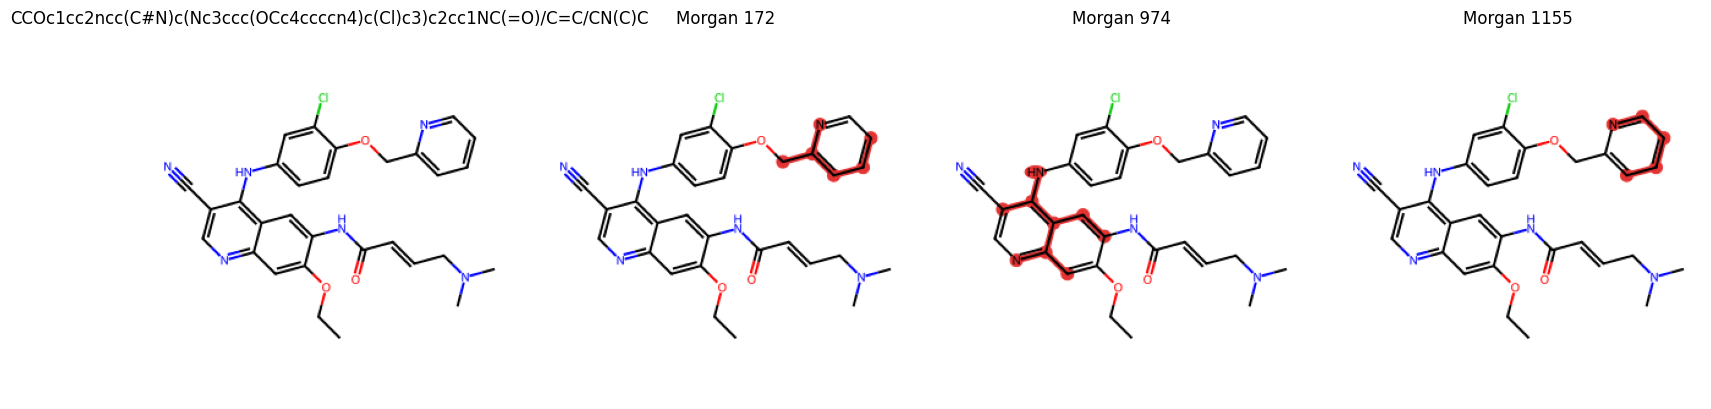

In [ ]:
show_morgan_plot([172, 974, 1155], smiles_2nd)

In [ ]:
import requests

chembl_id = "CHEMBL180022"
target_genes = {"EGFR", "ERBB1", "ERBB2", "HER2"}


response = requests.get(f"https://www.ebi.ac.uk/chembl/api/data/activity.json?molecule_chembl_id={chembl_id}&limit=1000")
activities = response.json().get("activities", [])

target_ids = {act["target_chembl_id"] for act in activities if "target_chembl_id" in act}

print("Neratinib targets the following HER2/EGFR-related proteins:\n")
found = False

for tid in target_ids:
    target_data = requests.get(f"https://www.ebi.ac.uk/chembl/api/data/target/{tid}.json").json()
    components = target_data.get("target_components", [])

    for comp in components:
        desc = comp.get("component_description", "")
        for xref in comp.get("target_component_xrefs", []):
            if xref.get("xref_src_db") == "UniProt":
                uniprot_id = xref["xref_id"]
                # Query UniProt to get gene symbol
                uniprot_resp = requests.get(f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json")
                if uniprot_resp.ok:
                    gene_info = uniprot_resp.json()
                    gene_names = []
                    for g in gene_info.get("genes", []):
                        # Safely get the gene name
                        if "geneName" in g:
                            gene_names.append(g["geneName"]["value"])
                    for gene in gene_names:
                        if gene.upper() in target_genes:
                            print(f"- {gene.upper()} ({desc})")
                            found = True

if not found:
    print("No HER2/EGFR targets found for Neratinib.")


Neratinib targets the following HER2/EGFR-related proteins:

- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- EGFR (Epidermal growth factor receptor)
- ERBB2 (Receptor tyrosine-protein kinase erbB-2)
- ERBB2 (Receptor tyrosine-protein kinase erbB-2)
- ERBB2 (Receptor tyrosine-protein kinase erbB-2)
- ERBB2 (Receptor tyrosine-protein kinase erbB-2)
- ERBB2 (Receptor tyrosine-protein kinase erbB-2)
- ERBB2 (Receptor tyrosine-protein kinase erbB-2)
- ERBB2 (Receptor tyrosine-protein kinase erbB-2)


## For Compound 3

In [ ]:
explainer = shap.Explainer(model_fingerprint, df_fingerprints[:3])

shap_values = explainer.shap_values(df_fingerprints[:3])

<ipython-input-43-498a3d5de089>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, df_fingerprints[:3], max_display=10)


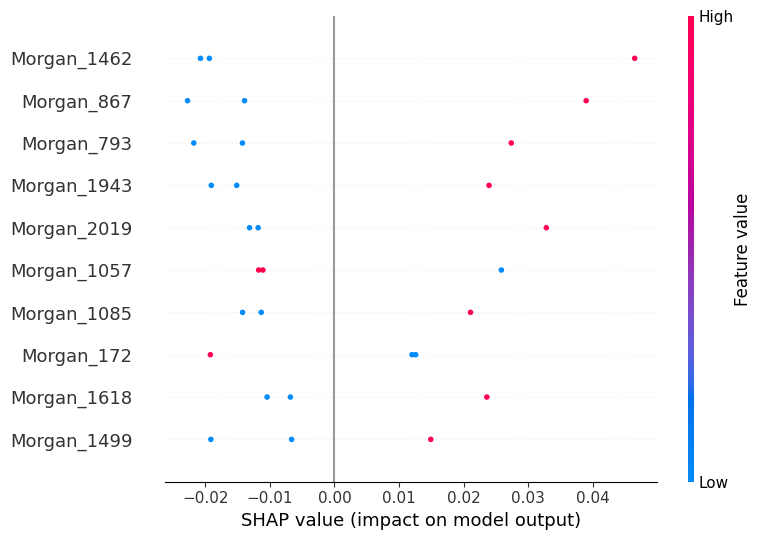

In [ ]:
shap.summary_plot(shap_values, df_fingerprints[:3], max_display=10)

In [ ]:
# Input SMILES
smiles_3rd = df.loc[2, 'Smiles']
mol = Chem.MolFromSmiles(smiles_3rd)

# Get Morgan fingerprint and bitInfo
info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=info)

# Print all active bit IDs
active_bits = sorted(info.keys())
print("Active Morgan bit IDs in the molecule:")
print(active_bits)

Active Morgan bit IDs in the molecule:
[1, 79, 80, 114, 246, 378, 389, 421, 649, 650, 699, 764, 786, 793, 807, 809, 824, 867, 875, 926, 935, 1009, 1028, 1164, 1171, 1290, 1292, 1349, 1380, 1453, 1462, 1477, 1480, 1496, 1499, 1539, 1589, 1618, 1652, 1687, 1840, 1873, 1917, 1928, 1934, 1943, 1946, 2009, 2019, 2028]


[12:09:27] DEPRECATION WARNING: please use MorganGenerator


[12:09:27] DEPRECATION WARNING: please use MorganGenerator


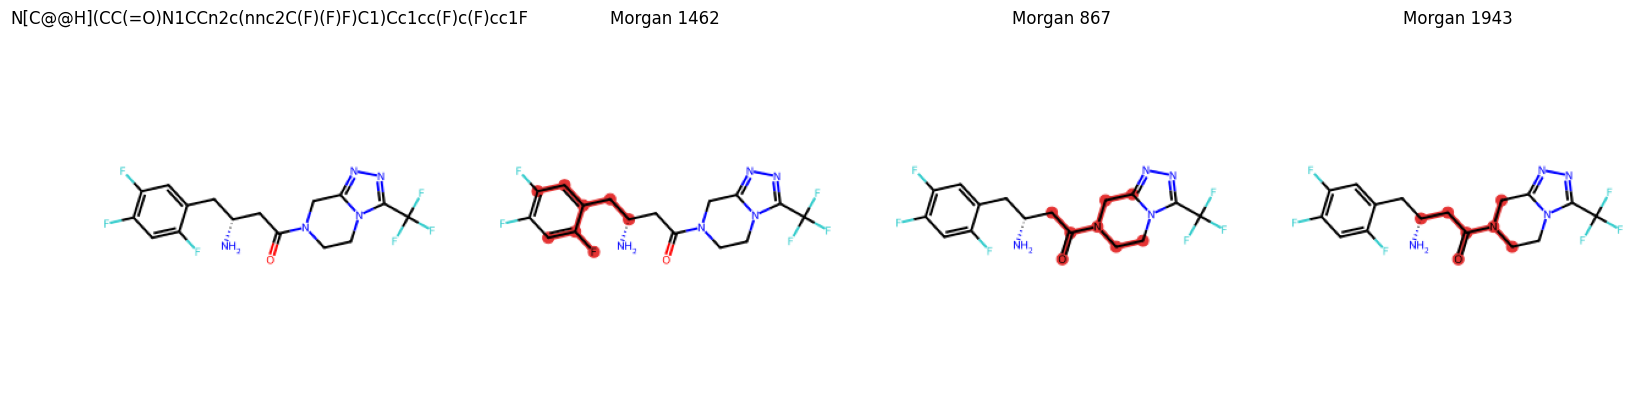

In [ ]:
show_morgan_plot([1462, 867, 1943], smiles_3rd)

In [ ]:
import requests

chembl_id = "CHEMBL1422"

# Get bioactivities
response = requests.get(f"https://www.ebi.ac.uk/chembl/api/data/activity.json?molecule_chembl_id={chembl_id}&limit=1000")
activities = response.json().get('activities', [])

# Collect unique target ChEMBL IDs
target_ids = set(act['target_chembl_id'] for act in activities if 'target_chembl_id' in act)

dpp4_found = False
dpp4_names = []
dpp4_uniprot = "P27487"

for tid in target_ids:
    target_data = requests.get(f"https://www.ebi.ac.uk/chembl/api/data/target/{tid}.json").json()
    pref_name = target_data.get("pref_name", "").lower()
    if "dipeptidyl peptidase" in pref_name or "dpp" in pref_name:
        dpp4_found = True
        dpp4_names.append(target_data.get("pref_name"))
    else:
        if "target_components" in target_data:
            for comp in target_data["target_components"]:
                for xref in comp.get("target_component_xrefs", []):
                    if xref.get("xref_src_db") == "UniProt" and xref.get("xref_id") == dpp4_uniprot:
                        dpp4_found = True
                        dpp4_names.append(target_data.get("pref_name"))

if dpp4_found:
    print(f"Sitagliptin is a dipeptidyl peptidase-4 (DPP-4) inhibitor. Target names found: {set(dpp4_names)}")
else:
    print("DPP-4 not found among Sitagliptin targets.")


Sitagliptin is a dipeptidyl peptidase-4 (DPP-4) inhibitor. Target names found: {'Dipeptidyl peptidase II', 'Dipeptidyl peptidase 9', 'Dipeptidyl peptidase IV', 'Dipeptidyl peptidase VIII', 'Dipeptidyl peptidase IX'}


## For Compound 4

In [ ]:
explainer = shap.Explainer(model_fingerprint, df_fingerprints[:4])

shap_values = explainer.shap_values(df_fingerprints[:4])

<ipython-input-48-c43e11f19ada>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, df_fingerprints[:4])


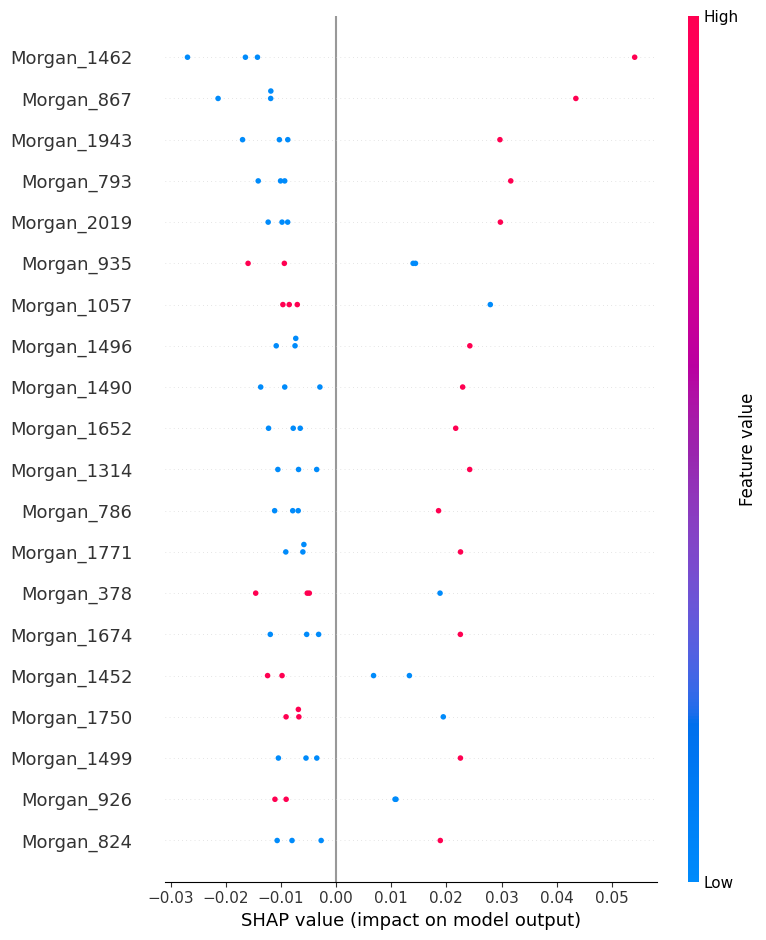

In [ ]:
shap.summary_plot(shap_values, df_fingerprints[:4])

In [ ]:
# Input SMILES
smiles_4th = df.loc[3, 'Smiles']

mol = Chem.MolFromSmiles(smiles_4th)

# Get Morgan fingerprint and bitInfo
info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048, bitInfo=info)

# Print all active bit IDs
active_bits = sorted(info.keys())
print("Active Morgan bit IDs in the molecule:")
print(active_bits)

Active Morgan bit IDs in the molecule:
[8, 74, 80, 107, 142, 197, 251, 252, 281, 294, 314, 352, 486, 527, 571, 586, 590, 620, 624, 650, 667, 692, 694, 699, 753, 807, 840, 875, 881, 932, 966, 1004, 1057, 1060, 1114, 1120, 1152, 1277, 1314, 1380, 1410, 1412, 1487, 1490, 1610, 1657, 1670, 1674, 1722, 1745, 1750, 1873, 1917, 1928, 1951, 1981, 1982]


[12:11:39] DEPRECATION WARNING: please use MorganGenerator


[12:11:39] DEPRECATION WARNING: please use MorganGenerator


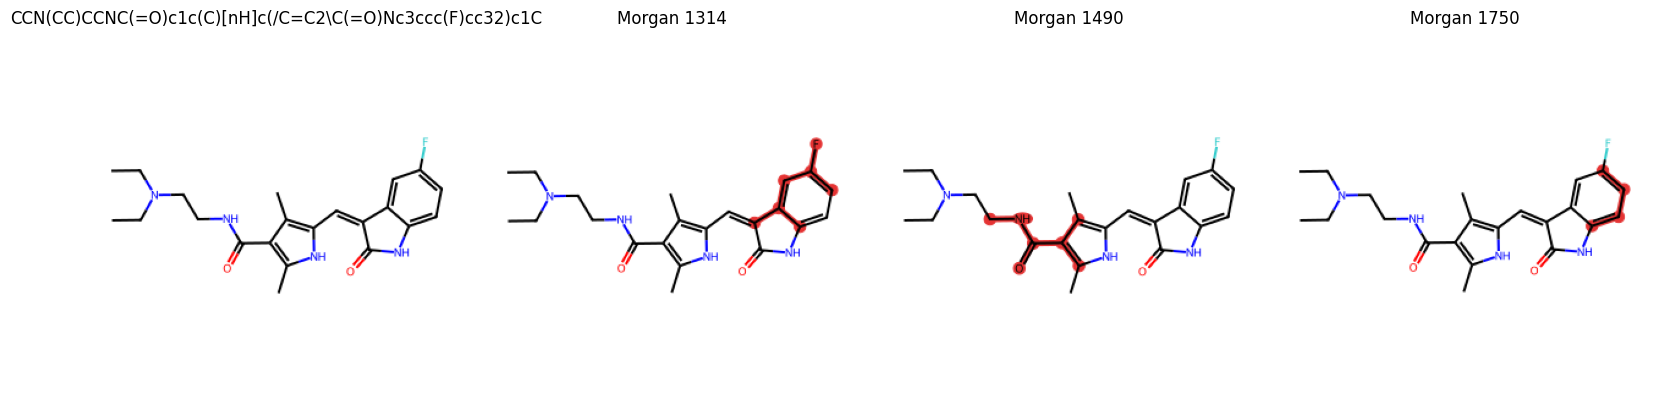

In [ ]:
show_morgan_plot([1314, 1490, 1750], smiles_4th)

In [ ]:
import requests

chembl_id = "CHEMBL535"

# Known RTK targets of Sunitinib grouped by family
rtk_families = {
    "Type III RTKs": {
        "KIT": "Stem cell factor receptor (CD117)",
        "PDGFRA": "Platelet-derived growth factor receptor alpha",
        "PDGFRB": "Platelet-derived growth factor receptor beta",
        "FLT3": "Fms-like tyrosine kinase 3"
    },
    "VEGF Receptors": {
        "FLT1": "VEGFR1 (Fms-like tyrosine kinase 1)",
        "KDR": "VEGFR2 (Kinase insert domain receptor)",
        "FLT4": "VEGFR3 (Fms-like tyrosine kinase 4)"
    },
    "CSF1R": {
        "CSF1R": "Colony-stimulating factor 1 receptor"
    }
}

# Fetch all activities for Sunitinib
response = requests.get(f"https://www.ebi.ac.uk/chembl/api/data/activity.json?molecule_chembl_id={chembl_id}&limit=1000")
activities = response.json().get("activities", [])
target_ids = {act["target_chembl_id"] for act in activities if "target_chembl_id" in act}

# Identify RTK targets
print("Sunitinib is a multi-targeted receptor tyrosine kinase (RTK) inhibitor.\n")
print("It targets the following RTKs:\n")

found_targets = {}

for tid in target_ids:
    target_data = requests.get(f"https://www.ebi.ac.uk/chembl/api/data/target/{tid}.json").json()
    if "target_components" in target_data:
        for comp in target_data["target_components"]:
            description = comp.get("component_description", "")
            for xref in comp.get("target_component_xrefs", []):
                if xref.get("xref_src_db") == "UniProt":
                    gene_symbol = xref["xref_id"].upper()
                    for family, genes in rtk_families.items():
                        for key, label in genes.items():
                            if key in description.upper():
                                found_targets.setdefault(family, set()).add(f"{key} – {label}")

for family, targets in found_targets.items():
    print(f"{family}:")
    for t in sorted(targets):
        print(f"- {t}")
    print()


Sunitinib is a multi-targeted receptor tyrosine kinase (RTK) inhibitor.

It targets the following RTKs:

Type III RTKs:
- FLT3 – Fms-like tyrosine kinase 3
- KIT – Stem cell factor receptor (CD117)

